In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read in the data
df = pd.read_csv('Show_Sales.csv')

# Data Exploration


In [ ]:
# Scatter Plot for Price vs Quantity Sold
plt.scatter(df['AvgPrice'], df['Quantity'])
plt.title('Demand Curve For All Shows')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')

Plotting quantity sold vs price shows a demand curve for all shows. The demand curve is downward sloping, which is consistent with the law of demand. As the price of the show increases, the quantity sold decreases. This shows that using the log-log model is appropriate for this data.

To examine if this relationship continues to hold for individual shows, we will plot the demand curve for the five most popular shows.

In [ ]:
top_shows = df.groupby('ProductID').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(5).reset_index()
print(top_shows)

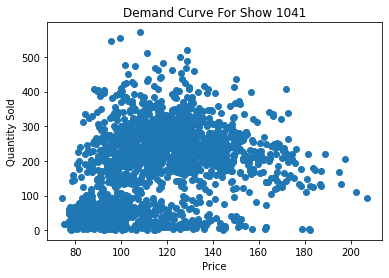

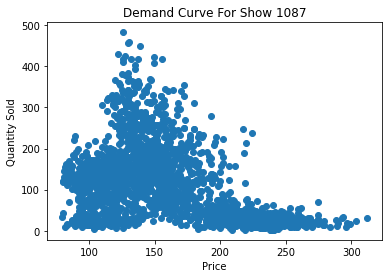

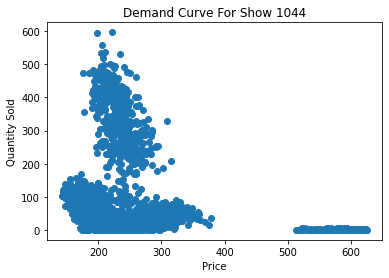

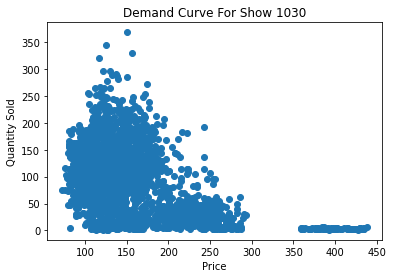

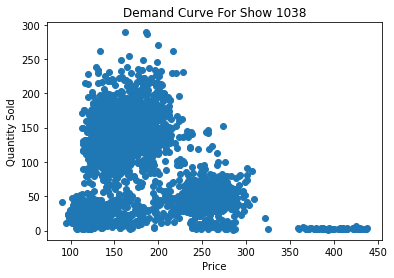

In [12]:
# Scatter Plot for Price vs Quantity Sold for the top 5 shows
# prevent from being plotted on the same graph
for show in top_shows['ProductID']:
    show_data = df[df['ProductID'] == show]
    plt.figure()
    plt.scatter(show_data['AvgPrice'], show_data['Quantity'])
    plt.title(f'Demand Curve For Show {show}')
    plt.xlabel('Price')
    plt.ylabel('Quantity Sold')


# Elasticity by Show

In [ ]:
from elasticity import *

# Calculate elasticity for all shows
elasticity = find_elasticity(df, insert_mean=False)

print(elasticity)

# histogram of elastic values
# remove the top 5% and bottom 5% of the data to remove outliers
elastic_vals = list(elasticity.values())
elastic_vals.sort()
elastic_vals = elastic_vals[round(len(elastic_vals)*0.05):round(len(elastic_vals)*0.95)]
plt.hist(elastic_vals, bins=20)

# Time Series Analysis

In [ ]:
# Quantity sold over time
df['StayDate'] = pd.to_datetime(df['StayDate'], format='%m/%d/%y')
df['Month'] = df['StayDate'].dt.month_name()
df['Year'] = df['StayDate'].dt.year

monthly_sales = df.groupby(['Year', 'Month']).agg({'Quantity': 'sum'}).reset_index()

plt.plot(monthly_sales['Quantity'])
plt.title('Quantity Sold Over Time')
plt.xlabel('Months')
plt.ylabel('Quantity Sold')



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

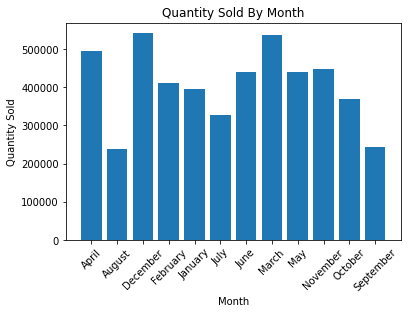

In [22]:
month_agg = df.groupby('Month').agg({'Quantity': 'sum'}).reset_index()
plt.bar(month_agg['Month'], month_agg['Quantity'])
plt.title('Quantity Sold By Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
